In this notebook, our goal is to train a CNN model using the CIFAR-10 image dataset. Additionally, we aim to explore and test various techniques, such as augmentation and transfer learning. To proceed, please follow the outlined steps.

# Libraries

Here, you can import the libraries you wish to use. Feel free to add more as needed.

In [2]:
import cv2
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Load the CIFAR10 dataset

Here, load the CIFAR-10 dataset from the prebuilt datasets in Keras as separate training and validation datasets.

In [4]:
class_names = ("Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck")

##################################################
################### YOUR CODES ###################
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
##################################################

print('Training:', x_train.shape, y_train.shape)
print('Validation:', x_val.shape, y_val.shape)

Training: (50000, 32, 32, 3) (50000, 1)
Validation: (10000, 32, 32, 3) (10000, 1)


Let's see some random examples.

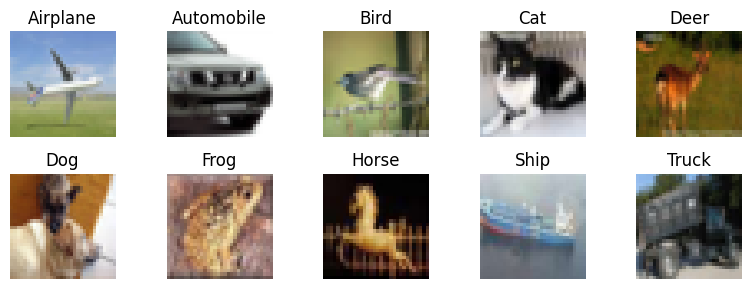

In [ ]:
fig = plt.figure(figsize=(8, 3))

for class_index in range(len(class_names)):
    examples = x_train[y_train.flatten() == class_index]
    random_index = np.random.randint(0, examples.shape[0])
    image = examples[random_index]

    ax = fig.add_subplot(2, 5, class_index + 1)
    ax.imshow(image)
    ax.set_title(class_names[class_index])
    ax.axis('off')

plt.tight_layout()
plt.show()

Remember to `normalize` your data and encode your labels using the `one-hot encoding` technique.

In [ ]:
##################################################
################### YOUR CODES ###################
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
##################################################

# a) Simple CNN model
In this section, you have to create your own simple CNN model using either the sequential or functional API provided by the Keras library. You can refer to the example provided in this [link](https://keras.io/examples/vision/mnist_convnet/) for guidance. Feel free to design your model according to your preferences.

In [ ]:
##################################################
################### YOUR CODES ###################
model = keras.Sequential()
model.add(layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))
##################################################

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

Now, it's time to compile your model using an appropriate `loss function` and `optimizer`.

In [ ]:
##################################################
################### YOUR CODES ###################
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
##################################################

Train your model for `10 epochs` and proper `batch_size`.

In [ ]:
##################################################
################### YOUR CODES ###################
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
##################################################

Epoch 1/10
1563/1563 [==============================] - 21s 6ms/step - loss: 1.4734 - accuracy: 0.4665 - val_loss: 1.1800 - val_accuracy: 0.5821
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0754 - accuracy: 0.6187 - val_loss: 1.0300 - val_accuracy: 0.6339
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9282 - accuracy: 0.6731 - val_loss: 0.9831 - val_accuracy: 0.6556
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8215 - accuracy: 0.7131 - val_loss: 0.8780 - val_accuracy: 0.6948
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7442 - accuracy: 0.7395 - val_loss: 0.8539 - val_accuracy: 0.7032
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6833 - accuracy: 0.7586 - val_loss: 0.8959 - val_accuracy: 0.6959
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6265 - accuracy: 0.7786 - val_loss: 0.8301 - val_accuracy

This function plots the `loss` and `accuracy` of your model by the model's history.

In [ ]:
def plot_acc_loss(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig = plt.figure(figsize=(10, 3))
    fig.add_subplot(1, 2, 1)
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    fig.add_subplot(1, 2, 2)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

Let's see your model performance.

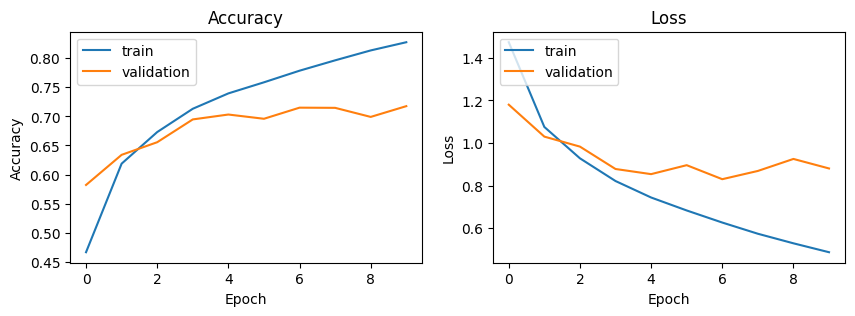

In [ ]:
plot_acc_loss(history)

# b) Simple CNN model + augmentation
In this section, you will utilize your previous model and apply `at least two` suitable augmentation techniques. For further guidance, you can refer to this  [link](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [ ]:
##################################################
################### YOUR CODES ###################
data_augmentation = keras.Sequential()
data_augmentation.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(32, 32, 3)))
data_augmentation.add(layers.experimental.preprocessing.RandomRotation(0.1))
data_augmentation.add(layers.experimental.preprocessing.RandomZoom(0.1))
data_augmentation.add(layers.experimental.preprocessing.RandomContrast(0.1))

model = keras.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))
##################################################

In [ ]:
##################################################
################### YOUR CODES ###################
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
##################################################

In [ ]:
##################################################
################### YOUR CODES ###################
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
##################################################

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 1.6201 - accuracy: 0.4120 - val_loss: 1.4383 - val_accuracy: 0.4815
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3292 - accuracy: 0.5253 - val_loss: 1.1655 - val_accuracy: 0.5899
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2133 - accuracy: 0.5701 - val_loss: 1.1461 - val_accuracy: 0.5952
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1391 - accuracy: 0.5984 - val_loss: 1.0995 - val_accuracy: 0.6153
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0897 - accuracy: 0.6158 - val_loss: 1.0212 - val_accuracy: 0.6384
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0462 - accuracy: 0.6333 - val_loss: 0.9622 - val_accuracy: 0.6634
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0095 - accuracy: 0.6429 - val_loss: 1.0418 - val_ac

Let's see your model performance with augmentation.

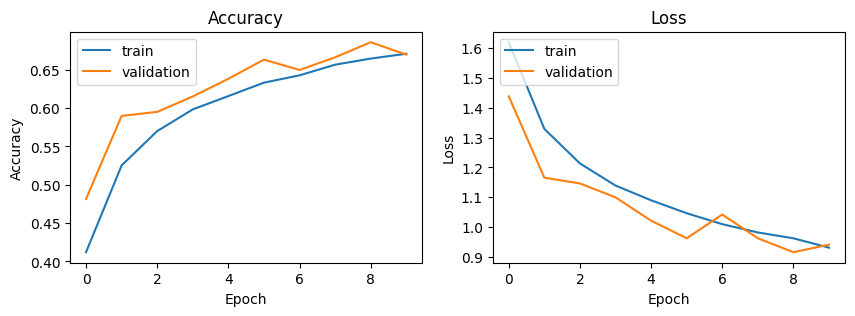

In [ ]:
plot_acc_loss(history)

# c) Transfer learning: Using pretrained ResNet50 on ImageNet
For more detailed guidance, please refer to this [link](https://keras.io/guides/transfer_learning/).

## Resize input to 224 * 224 (`extra bonus`)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,
    validation_split=0.2
)

# Resize and preprocess the images using the ImageDataGenerator
train_generator = datagen.flow(x_train, to_categorical(y_train), batch_size=64, subset='training', shuffle=True)
validation_generator = datagen.flow(x_val, to_categorical(y_val), batch_size=64, subset='validation', shuffle=False)

# Create an instance of the ResNet50 model
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    
# Create a new model based on ResNet50
model = Sequential()
model.add(resnet50)
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
625/625 [==============================] - 85s 56ms/step - loss: 1.4337 - accuracy: 0.5535 - val_loss: 3.0301 - val_accuracy: 0.1870
Epoch 2/10
625/625 [==============================] - 35s 55ms/step - loss: 1.3019 - accuracy: 0.5973 - val_loss: 1.5658 - val_accuracy: 0.5380
Epoch 3/10
625/625 [==============================] - 33s 53ms/step - loss: 1.3470 - accuracy: 0.5793 - val_loss: 1.0355 - val_accuracy: 0.6400
Epoch 4/10
625/625 [==============================] - 33s 53ms/step - loss: 1.1697 - accuracy: 0.6345 - val_loss: 306.7904 - val_accuracy: 0.2205
Epoch 5/10
625/625 [==============================] - 33s 53ms/step - loss: 1.3943 - accuracy: 0.5659 - val_loss: 1.1418 - val_accuracy: 0.6150
Epoch 6/10
625/625 [==============================] - 34s 54ms/step - loss: 0.9182 - accuracy: 0.6957 - val_loss: 0.8665 - val_accuracy: 0.6985
Epoch 7/10
625/625 [==============================] - 33s 54ms/step - loss: 1.0401 - accuracy: 0.6763 - val_loss: 2.7617 - val_accurac

## Use only the first three blocks (`extra bonus`)

In [ ]:
# Create the model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
